## 1 - Hello Transformers

In [1]:
from transformers import pipeline
import pandas as pd
import warnings
import numpy as np
import tensorflow as tf
warnings.filterwarnings('ignore')

/Users/rishabharya/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/rishabharya/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
clf = pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""
print(text)

Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.


In [4]:
output = clf(text)
pd.DataFrame(output)

,label,score
0,NEGATIVE,0.901547


In [5]:
ner_tagger = pipeline("ner",aggregation_strategy='simple')
output = ner_tagger(text)
pd.DataFrame(output)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590255,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498348,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812097,Bumblebee,502,511


In [6]:
reader = pipeline('question-answering')
ques = "What does the customer want ?"
output = reader(question=ques,context=text)
pd.DataFrame([output])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [7]:
summarizer = pipeline('summarization')
outputs = summarizer(text,max_length=45,clean_up_tokenization_spaces=True)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your min_length=56 must be inferior than your max_length=45.


In [8]:
print(outputs[0]['summary_text'])

 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


In [9]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text,clean_up_tokenization_spaces=True,min_length=100)
print(outputs[0]['translation_text'])

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


In [10]:
generator = pipeline('text-generation')
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
output = generator(prompt,max_length=200)
print(output[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I will try my best to fix this as quickly as possible, but not before you get back to me to correct your mistake.


## 2 - Text Classification

In [11]:
from datasets import list_datasets
all_datasets = list_datasets()
print("Total no. of Datasets available : ",len(all_datasets))
print(all_datasets[:10])

Total no. of Datasets available :  110147
['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [12]:
from datasets import load_dataset
emotions = load_dataset('emotion')

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/rishabharya/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [15]:
print(len(train_ds))
print(train_ds[0])
print(train_ds.features)

16000
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [16]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [17]:
df = pd.DataFrame(train_ds)
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [18]:
df['label_name'] = df['label'].apply(lambda x : emotions['train'].features['label'].int2str(x))

In [19]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


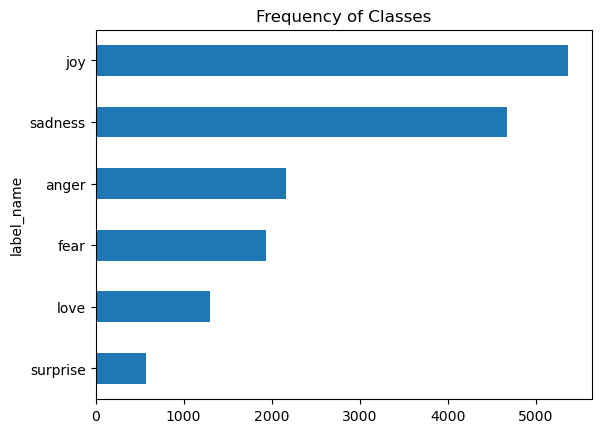

In [20]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

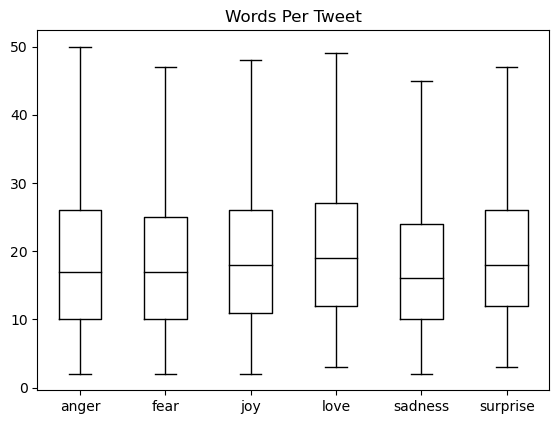

In [21]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [22]:
emotions.reset_format()

In [23]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [24]:
token2idx = {ch : i for i,ch in enumerate(sorted(set(tokenized_text)))}

In [25]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [26]:
input_ids = [token2idx[ch] for ch in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [27]:
one_hot_encodings = tf.one_hot(input_ids,depth=len(token2idx))
one_hot_encodings.shape

TensorShape([38, 20])

In [28]:
one_hot_encodings[0]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [29]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [30]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [31]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [32]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [33]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [34]:
tokenizer.vocab_size

30522

In [35]:
tokenizer.model_max_length

512

In [36]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [37]:
def tokenize(batch):
    return tokenizer(batch['text'],padding=True,truncation=True)

In [38]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [39]:
emotions_encoded = emotions.map(tokenize, batched=True,batch_size=None)
print(emotions_encoded["train"].column_names)

Loading cached processed dataset at /Users/rishabharya/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-fa4aa40a59b5b962.arrow
Loading cached processed dataset at /Users/rishabharya/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-82a66b0d1922ba26.arrow
Loading cached processed dataset at /Users/rishabharya/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-f17817640688067f.arrow


['text', 'label', 'input_ids', 'attention_mask']


In [40]:
pd.DataFrame(emotions_encoded["train"])

,text,label,input_ids,attention_mask
0,i didnt feel humiliated,0,"[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i can go from feeling so hopeless to so damned...,0,"[101, 1045, 2064, 2175, 2013, 3110, 2061, 2062...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,im grabbing a minute to post i feel greedy wrong,3,"[101, 10047, 9775, 1037, 3371, 2000, 2695, 104...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
3,i am ever feeling nostalgic about the fireplac...,2,"[101, 1045, 2572, 2412, 3110, 16839, 9080, 128...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,i am feeling grouchy,3,"[101, 1045, 2572, 3110, 24665, 7140, 11714, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,"[101, 1045, 2074, 2018, 1037, 2200, 4766, 2051...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
15996,i am now turning and i feel pathetic that i am...,0,"[101, 1045, 2572, 2085, 3810, 1998, 1045, 2514...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
15997,i feel strong and good overall,1,"[101, 1045, 2514, 2844, 1998, 2204, 3452, 102,...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
15998,i feel like this was such a rude comment and i...,3,"[101, 1045, 2514, 2066, 2023, 2001, 2107, 1037...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [41]:
from transformers import TFAutoModel
model_ckpt = "distilbert-base-uncased"
device = tf.device("/GPU:0" if tf.config.list_physical_devices("GPU") else "/CPU:0")
model = TFAutoModel.from_pretrained(model_ckpt,from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [42]:
text = "this is a test"
inputs = tokenizer(text,return_tensors="tf")
inputs

{'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 2003, 1037, 3231,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [43]:
inputs['input_ids']

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 2003, 1037, 3231,  102]], dtype=int32)>

In [44]:
tokenizer.convert_ids_to_tokens(np.array(inputs.input_ids)[0])

['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']

In [45]:
outputs = model(inputs)
outputs

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 6, 768), dtype=float32, numpy=
array([[[-0.15651295, -0.18619652,  0.05277672, ..., -0.11881152,
          0.06620596,  0.5470157 ],
        [-0.3575137 , -0.6483561 , -0.06178983, ..., -0.3040195 ,
          0.35076842,  0.52206826],
        [-0.2771846 , -0.4459446 ,  0.1818429 , ..., -0.09477936,
         -0.00757474,  0.9958283 ],
        [-0.28408554, -0.39167666,  0.37525564, ..., -0.2150574 ,
         -0.11725193,  1.0526481 ],
        [ 0.26608273, -0.50936395, -0.3180135 , ..., -0.4202983 ,
          0.01444202, -0.21489483],
        [ 0.9440611 ,  0.01117271, -0.47139424, ...,  0.14394692,
         -0.7287839 , -0.16194962]]], dtype=float32)>, hidden_states=None, attentions=None)

In [46]:
outputs.last_hidden_state.shape

TensorShape([1, 6, 768])

In [47]:
outputs.last_hidden_state.numpy()

array([[[-0.15651295, -0.18619652,  0.05277672, ..., -0.11881152,
          0.06620596,  0.5470157 ],
        [-0.3575137 , -0.6483561 , -0.06178983, ..., -0.3040195 ,
          0.35076842,  0.52206826],
        [-0.2771846 , -0.4459446 ,  0.1818429 , ..., -0.09477936,
         -0.00757474,  0.9958283 ],
        [-0.28408554, -0.39167666,  0.37525564, ..., -0.2150574 ,
         -0.11725193,  1.0526481 ],
        [ 0.26608273, -0.50936395, -0.3180135 , ..., -0.4202983 ,
          0.01444202, -0.21489483],
        [ 0.9440611 ,  0.01117271, -0.47139424, ...,  0.14394692,
         -0.7287839 , -0.16194962]]], dtype=float32)

In [48]:
outputs.last_hidden_state[:,0].numpy()

array([[-1.56512946e-01, -1.86196521e-01,  5.27767166e-02,
        -1.06344089e-01, -1.31630152e-02, -2.69437999e-01,
         9.22702923e-02,  1.58652872e-01, -9.86747146e-02,
        -2.95723021e-01, -1.37878537e-01, -3.80611792e-02,
        -5.36169969e-02,  1.30451977e-01,  3.97127569e-02,
         8.68933871e-02,  2.50870697e-02,  8.61768052e-03,
         2.52425730e-01, -1.36781216e-01, -1.21373281e-01,
        -1.38957888e-01, -1.34264648e-01, -9.08444896e-02,
         3.05091180e-02, -3.86192948e-02,  1.14854723e-01,
        -5.79964966e-02,  1.01310454e-01,  9.79197621e-02,
         3.87418084e-03,  1.19504899e-01, -6.63392246e-02,
        -2.12571677e-02,  1.30903736e-01,  2.65200175e-02,
         2.36243665e-01,  5.02198115e-02,  1.35029331e-02,
        -2.13794298e-02, -8.83227438e-02, -9.83602554e-02,
         2.26749077e-01, -2.49399841e-02, -1.62608668e-01,
        -8.37870985e-02, -1.96290541e+00, -1.45407155e-01,
        -1.55823097e-01, -3.54869664e-01, -4.59713265e-0

In [49]:
def extract_hidden_states(batch):
    inputs = {key: value for key,value in batch.items() if key in tokenizer.model_input_names}
    outputs = model(inputs)
    return {"hidden_state": outputs.last_hidden_state[:,0].numpy()}

In [50]:
emotions_encoded.set_format("tf",columns=['input_ids','attention_mask','label'])

In [51]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [52]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [53]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [54]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [55]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2,metric='cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_,columns=['X','Y'])
df_emb['label'] = y_train
df_emb

,X,Y,label
0,4.237541,6.710385,0
1,-3.040609,5.766124,0
2,5.323312,3.203564,3
3,-2.581026,3.409357,2
4,-3.193238,3.947110,3
...,...,...,...
15995,-0.382951,6.901903,0
15996,-2.024183,5.655280,0
15997,-2.341858,3.324586,1
15998,5.187880,3.451589,3


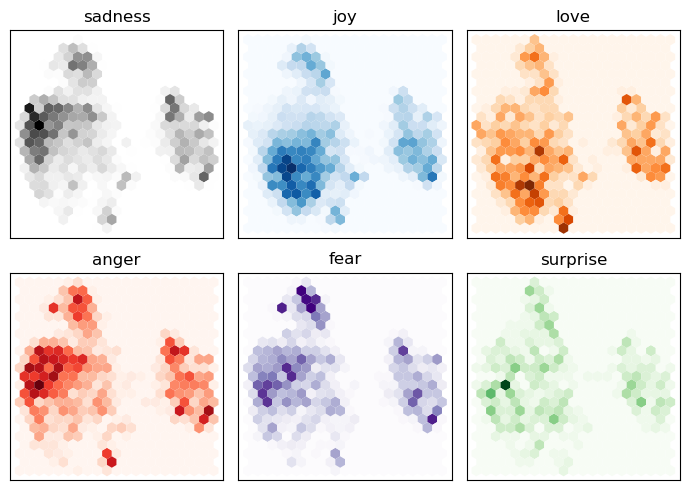

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [58]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

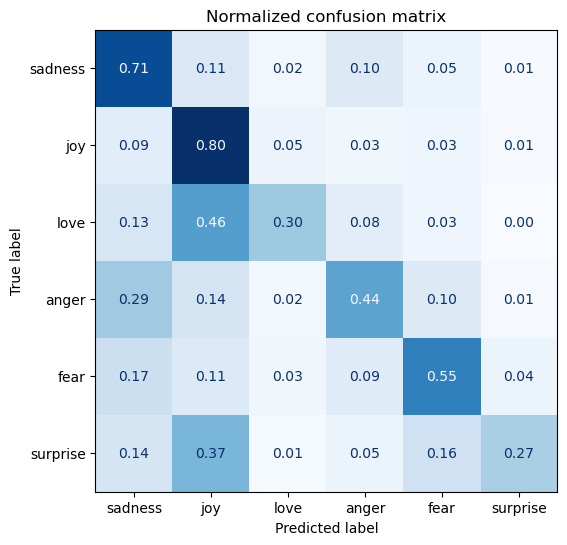

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [74]:
from transformers import TFAutoModelForSequenceClassification
num_labels = 6
model = TFAutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels)

In [61]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [71]:
from huggingface_hub import notebook_login

notebook_login()

In [77]:
tokenizer_columns = tokenizer.model_input_names
batch_size=64
tf_train_dataset = emotions_encoded['train'].to_tf_dataset(columns=tokenizer_columns,
                    label_cols=['label'],shuffle=True,batch_size=batch_size)
tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(columns=tokenizer_columns,
                    label_cols=['label'],shuffle=True,batch_size=batch_size)

In [79]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [81]:
model.fit(tf_train_dataset,validation_data=tf_eval_dataset,epochs=2)

Epoch 1/2
250/250 [==============================] - 1326s 5s/step - loss: 0.5320 - sparse_categorical_accuracy: 0.8100 - val_loss: 0.1841 - val_sparse_categorical_accuracy: 0.9335
Epoch 2/2
250/250 [==============================] - 1332s 5s/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.1396 - val_sparse_categorical_accuracy: 0.9395


In [181]:
def forward_pass_with_label(batch):
    inputs = {k:v for k,v in batch.items() if k in tokenizer.model_input_names}
    outputs = model(inputs)
    pred_label = np.argmax(outputs.logits,axis=-1)
    
    cce = tf.keras.losses.SparseCategoricalCrossentropy(reduction="none")
    loss = cce(batch['label'],outputs.logits)
    return {"loss" : loss.numpy(),"predicted_label":pred_label}

In [182]:
emotions_encoded.set_format("tf",columns=['input_ids','attention_mask','label'])

In [183]:
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label,
                                                                   batched=True,batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [188]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [189]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [190]:
df_test

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,5.960463e-07
1,i feel like i am still looking at a blank canv...,sadness,sadness,5.960463e-07
2,i feel like a faithful servant,love,love,6.931474e-01
3,i am just feeling cranky and blue,anger,anger,5.960463e-07
4,i can have for a treat or if i am feeling festive,joy,joy,5.960463e-07
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,sadness,5.960463e-07
1996,i constantly worry about their fight against n...,joy,joy,5.960463e-07
1997,i feel its important to share this info for th...,joy,joy,5.960463e-07
1998,i truly feel that if you are passionate enough...,joy,joy,6.931474e-01


In [191]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1852,i arrived home with a strange feeling of happi...,sadness,fear,16.811243
415,im kind of embarrassed about feeling that way ...,love,joy,16.811243
1950,i as representative of everything thats wrong ...,surprise,love,16.686106
258,talking to a very good friend who had just had...,sadness,joy,16.673891
1111,im lazy my characters fall into categories of ...,joy,fear,16.413326
188,i was going to tell you more about my trip to ...,sadness,joy,16.118095
1032,i began to feel woeful as i stared into the ab...,sadness,joy,16.118095
495,i feel so squeezed hate this feeling thats why...,sadness,fear,16.118095
177,im sure much of the advantage is psychological...,sadness,joy,16.118095
1683,i had applied for a job and they had assured m...,anger,joy,4.200248


In [192]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
999,i feel shy now,fear,fear,4.768370e-07
719,i no longer feel terrified,fear,fear,4.768370e-07
1237,i still feel really shaken about the whole thing,fear,fear,4.768370e-07
717,i feel a little frantic because i know peoples...,fear,fear,4.768370e-07
1777,i mulled this idea over in my head as much as ...,fear,fear,4.768370e-07
1503,i was willing to be honest with myself and put...,surprise,surprise,4.768370e-07
1773,i feel less hesitant predicting that the oeuvr...,fear,fear,4.768370e-07
1232,i feel a bit frantic today with everything i n...,fear,fear,4.768370e-07
1769,i feel so impressed by a dental work in front ...,surprise,surprise,4.768370e-07
712,i feel frightened to see a million youngsters ...,fear,fear,4.768370e-07
